# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
import xgboost as xgb
import statsmodels.api as sm
from scipy import stats
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

# Dataset

In [ ]:
diamond_df = pd.read_csv('diamonds.csv')
diamond_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
diamond_df.shape

(53940, 11)

# Changing the dataset after researching in file "graphs_of_progect.ipynb"

In [ ]:
diamond_df = diamond_df.drop(['x','y','z','table','depth'], axis=1)

Using z-score and rule 68-95-99.7 for correction of dataset outliers

In [ ]:
int_cols=['carat']
z = stats.zscore(diamond_df[int_cols])
z.head()

,carat
0,-1.198168
1,-1.240361
2,-1.198168
3,-1.071587
4,-1.029394


In [ ]:
diamond_df[(np.abs(z) > 3).any(axis = 1)].head()

,Unnamed: 0,carat,cut,color,clarity,price
13757,13758,2.22,Fair,J,I1,5607
14138,14139,2.27,Fair,J,I1,5733
15684,15685,2.49,Fair,J,I1,6289
16283,16284,3.00,Very Good,H,I1,6512
16439,16440,2.22,Fair,H,I1,6564


In [ ]:
z_mask = (np.abs(z) < 3).all(axis = 1)
diamond_df= diamond_df[z_mask]
diamond_df.shape
#Was 53940

(53501, 6)

Was deleted 439 rows

In [ ]:
cut_quality_prices = diamond_df.groupby('cut')['price'].mean()#
cut_quality_prices

cut
Fair         4132.636015
Good         3846.463149
Ideal        3392.133542
Premium      4440.863650
Very Good    3917.580787
Name: price, dtype: float64

Splitting dataset

In [ ]:
X = diamond_df.drop(['price'], axis=1)
y = diamond_df['price']
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Using label_encoder to convert categorical columns into numerical ones

In [ ]:
label_encoder = LabelEncoder()

X_train['cut'] = label_encoder.fit_transform(X_train['cut'])
X_test['cut'] = label_encoder.transform(X_test['cut'])

X_train['color'] = label_encoder.fit_transform(X_train['color'])
X_test['color'] = label_encoder.transform(X_test['color'])

X_train['clarity'] = label_encoder.fit_transform(X_train['clarity'])
X_test['clarity'] = label_encoder.transform(X_test['clarity'])

Standartizing data

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Function for calculate different metrics of models

In [ ]:
def evaluate(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

# **LinearRegression**

In [1]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

NameError: ignored

Checking weights of the model

In [ ]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

Calculating mean absolute error on training set to compare it with the same on testing set and to control overfitting

In [ ]:
y_pred_train=lin_reg.predict(X_train_scaled)
mae_train=mean_absolute_error(y_train, y_pred_train)
print('MAE train', mae_train)

In [ ]:
y_pred = lin_reg.predict(X_test_scaled)

In [ ]:
print('Mean Absolute Error: ',evaluate(y_test, y_pred)[0])
print('Mean Squared Error: ', evaluate(y_test, y_pred)[1])
print('Root Mean Squared Error: ',evaluate(y_test, y_pred)[2])
print('R2 Score: ',evaluate(y_test, y_pred)[3])

Adding metrics to the table, which contains all of the metrics of different models

In [ ]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, y_pred)]],
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

# **RandomForest**

In [ ]:
tree_model = RandomForestRegressor(random_state=42)
tree_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_train=tree_model.predict(X_train_scaled)
mae_train=mean_absolute_error(y_train, y_pred_train)
print('MAE train', mae_train)

MAE train 0.9411156208277847


In [ ]:
y_pred = tree_model.predict(X_test_scaled)

In [ ]:
print('Mean Absolute Error: ',evaluate(y_test, y_pred)[0])
print('Mean Squared Error: ', evaluate(y_test, y_pred)[1])
print('Root Mean Squared Error: ',evaluate(y_test, y_pred)[2])
print('R2 Score: ',evaluate(y_test, y_pred)[3])

Mean Absolute Error:  2.2296722945610976
Mean Squared Error:  1324.1033926048217
Root Mean Squared Error:  36.38823151246597
R2 Score:  0.9999109765763541


In [ ]:
results_df_2 = pd.DataFrame(data=[["Random Forest Regression", *evaluate(y_test, y_pred)]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])
results_df = results_df.append(results_df_2, ignore_index=True)

# **XGBRFRegressor**

In [ ]:
xgb_model = xgb.XGBRFRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=42, reg_alpha=None, ...)

In [ ]:
y_pred_train=xgb_model.predict(X_train_scaled)
mae_train=mean_absolute_error(y_train, y_pred_train)
print('MAE train', mae_train)

MAE train 112.43817405955336


In [ ]:
y_pred = xgb_model.predict(X_test_scaled)

In [ ]:
print('Mean Absolute Error: ',evaluate(y_test, y_pred)[0])
print('Mean Squared Error: ', evaluate(y_test, y_pred)[1])
print('Root Mean Squared Error: ',evaluate(y_test, y_pred)[2])
print('R2 Score: ',evaluate(y_test, y_pred)[3])

Mean Absolute Error:  114.42504340945341
Mean Squared Error:  42668.56344418144
Root Mean Squared Error:  206.56370311403074
R2 Score:  0.9971312651103601


In [ ]:
results_df_2 = pd.DataFrame(data=[["Gradient Boosting Regressor", *evaluate(y_test, y_pred)]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])
results_df = results_df.append(results_df_2, ignore_index=True)

# **Ridge**

In [ ]:
ridge_model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=100, random_state=42, solver='cholesky')

In [ ]:
y_pred_train=ridge_model.predict(X_train_scaled)
mae_train=mean_absolute_error(y_train, y_pred_train)
print('MAE train', mae_train)

MAE train 937.1196991854588


In [ ]:
y_pred = ridge_model.predict(X_test_scaled)

In [ ]:
print('Mean Absolute Error: ',evaluate(y_test, y_pred)[0])
print('Mean Squared Error: ', evaluate(y_test, y_pred)[1])
print('Root Mean Squared Error: ',evaluate(y_test, y_pred)[2])
print('R2 Score: ',evaluate(y_test, y_pred)[3])

Mean Absolute Error:  936.6902553806689
Mean Squared Error:  1808947.1499729524
Root Mean Squared Error:  1344.9710591581338
R2 Score:  0.8783790832463652


In [ ]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, y_pred)]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])
results_df = results_df.append(results_df_2, ignore_index=True)

# **SGDRegressor**

In [ ]:
sgd_model = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_model.fit(X_train_scaled, y_train)

SGDRegressor(eta0=0.0001, max_iter=100000, n_iter_no_change=250, penalty=None)

In [ ]:
y_pred_train=sgd_model.predict(X_train_scaled)
mae_train=mean_absolute_error(y_train, y_pred_train)
print('MAE train', mae_train)

MAE train 939.1966966587806


In [ ]:
y_pred = sgd_model.predict(X_test_scaled)

In [ ]:
print('Mean Absolute Error: ',evaluate(y_test, y_pred)[0])
print('Mean Squared Error: ', evaluate(y_test, y_pred)[1])
print('Root Mean Squared Error: ',evaluate(y_test, y_pred)[2])
print('R2 Score: ',evaluate(y_test, y_pred)[3])

Mean Absolute Error:  939.0254684380744
Mean Squared Error:  1809523.6420237513
Root Mean Squared Error:  1345.1853560100003
R2 Score:  0.8783403239649122


In [ ]:
results_df_2 = pd.DataFrame(data=[["SGDRegression", *evaluate(y_test, y_pred)]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])
results_df = results_df.append(results_df_2, ignore_index=True)

# **Neural** Network

In [ ]:
model = Sequential()

model.add(Dense(X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer=Adam(0.001), loss='mae')

r = model.fit(X_train_scaled, y_train,
              validation_data=(X_test_scaled,y_test),
              batch_size=10,
              epochs=10)

Epoch 1/10
3745/3745 [==============================] - 23s 6ms/step - loss: 963.9794 - val_loss: 646.2190
Epoch 2/10
3745/3745 [==============================] - 22s 6ms/step - loss: 754.5096 - val_loss: 574.1351
Epoch 3/10
3745/3745 [==============================] - 13s 4ms/step - loss: 719.0535 - val_loss: 553.9460
Epoch 4/10
3745/3745 [==============================] - 13s 3ms/step - loss: 685.2930 - val_loss: 492.7487
Epoch 5/10
3745/3745 [==============================] - 13s 3ms/step - loss: 637.4802 - val_loss: 374.4183
Epoch 6/10
3745/3745 [==============================] - 13s 3ms/step - loss: 593.6225 - val_loss: 329.5347
Epoch 7/10
3745/3745 [==============================] - 13s 3ms/step - loss: 559.0940 - val_loss: 284.3768
Epoch 8/10
3745/3745 [==============================] - 13s 3ms/step - loss: 530.9852 - val_loss: 219.9655
Epoch 9/10
3745/3745 [==============================] - 13s 3ms/step - loss: 519.0356 - val_loss: 209.1496
Epoch 10/10
3745/3745 [==============

In [ ]:
y_pred = model.predict(X_test_scaled)
results_df_2 = pd.DataFrame(data=[["Neural Network", *evaluate(y_test, y_pred)]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])
results_df = results_df.append(results_df_2, ignore_index=True)

502/502 [==============================] - 1s 2ms/step


In [ ]:
print('Mean Absolute Error: ',evaluate(y_test, y_pred)[0])
print('Mean Squared Error: ', evaluate(y_test, y_pred)[1])
print('Root Mean Squared Error: ',evaluate(y_test, y_pred)[2])
print('R2 Score: ',evaluate(y_test, y_pred)[3])

Mean Absolute Error:  294.17613662359435
Mean Squared Error:  192038.15127655616
Root Mean Squared Error:  438.22157783084594
R2 Score:  0.9870887018394776


**Comparing models**

In [ ]:
results_df

,Model,MAE,MSE,RMSE,R2 Score
0,Linear Regression,939.027385,1.809524e+06,1345.185546,0.878340
1,Random Forest Regression,2.229672,1.324103e+03,36.388232,0.999911
2,Gradient Boosting Regressor,114.425043,4.266856e+04,206.563703,0.997131
3,Ridge Regression,936.690255,1.808947e+06,1344.971059,0.878379
4,SGDRegression,939.025468,1.809524e+06,1345.185356,0.878340
5,Neural Network,294.176137,1.920382e+05,438.221578,0.987089


<Axes: >

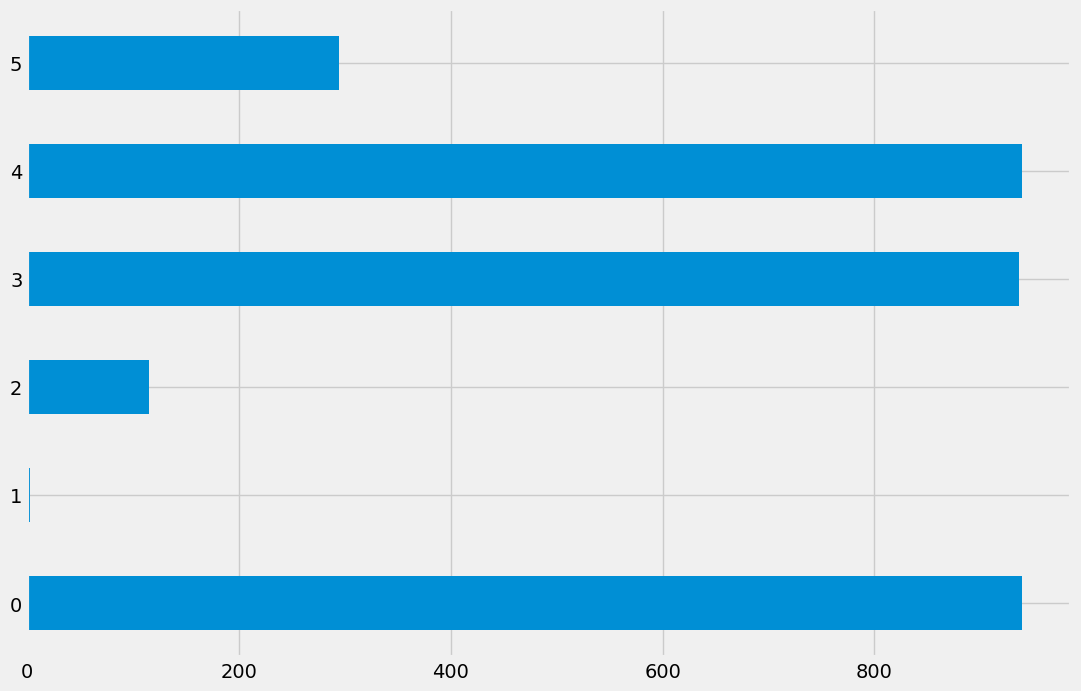

In [ ]:
results_df['MAE'].plot(kind='barh', figsize=(12, 8))

<Axes: >

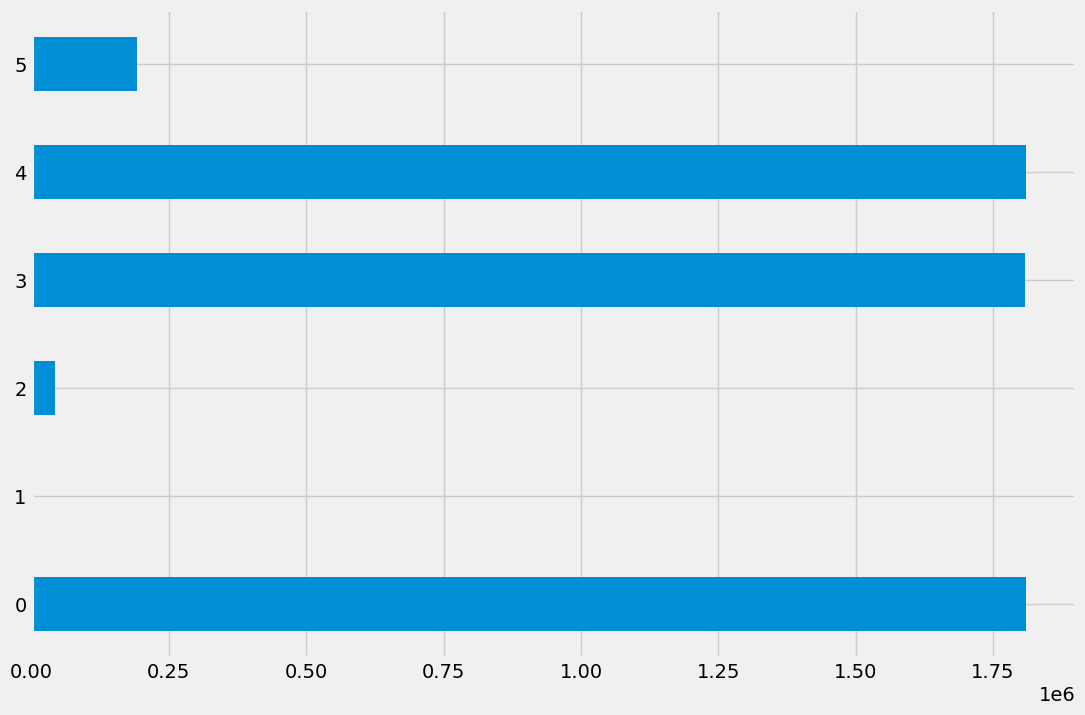

In [ ]:
results_df['MSE'].plot(kind='barh', figsize=(12, 8))

<Axes: >

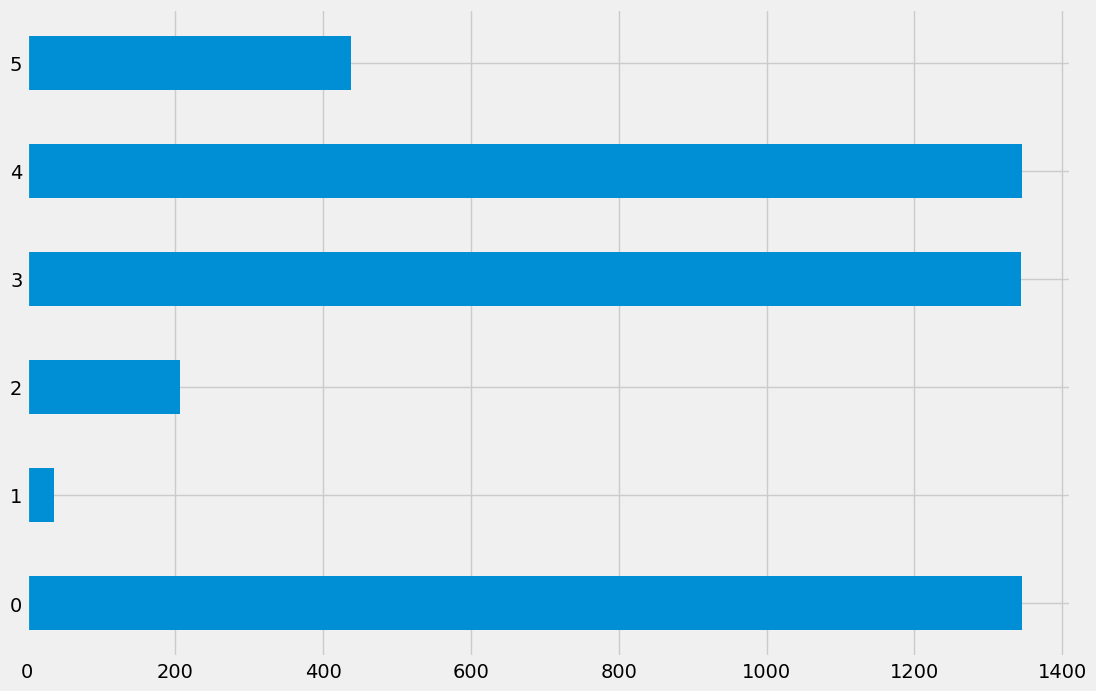

In [ ]:
results_df['RMSE'].plot(kind='barh', figsize=(12, 8))

<Axes: >

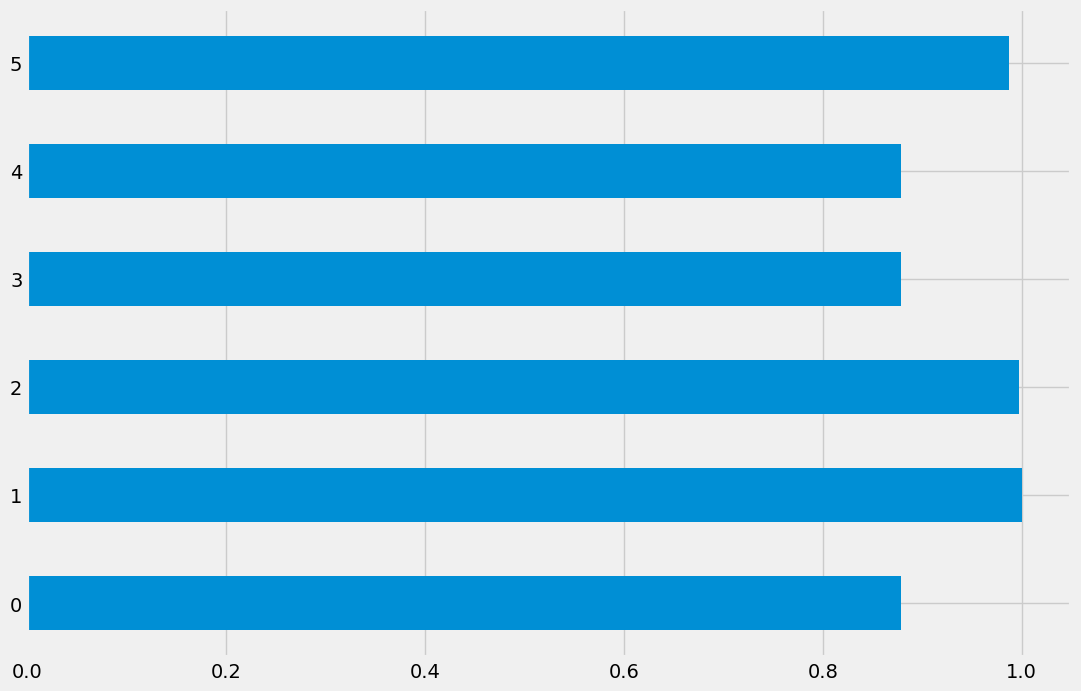

In [ ]:
results_df['R2 Score'].plot(kind='barh', figsize=(12, 8))

**Thus, for the given dataset and prediction task, Random Forest Regressor has the best performance in all four graphs.
In terms of MSE, RMSE and R2 Score metrics, after Random Forest Regressor, the neural network is the most optimal and with low error rate.
Next in terms of error rate is Gradient Busting, followed by Ridge Regressor, linear regression.
SGDRegression was the least optimal model in terms of number of errors.**